# Figure 2 : Ripple oscillations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from neuropy import plotting
from neuropy.utils import signal_process
import subjects
import pandas as pd
from scipy import stats
from neuropy.utils import mathutil
from scipy.ndimage import gaussian_filter1d

sd_sessions = subjects.sd.allsess
nsd_sessions = subjects.nsd.allsess

print(sd_sessions)
print(nsd_sessions)

[ProcessData(RatJ_Day1_2019-05-31_03-55-36.xml)
, ProcessData(RatK_Day1_2019-08-06_03-44-01.xml)
, ProcessData(RatN_Day1_2019-10-09_03-52-32.xml)
, ProcessData(RatS_Day3SD_2020-11-29_07-53-30.xml)
, ProcessData(RatR_Day2SD_2021-05-23_09-07-18.xml)
, ProcessData(RatU_Day4SD_2021-07-29_08-23-06.xml)
, ProcessData(RatV_Day2SD_2021-10-04_08-02-10.xml)
]
[ProcessData(RatJ_Day2_2019-06-02_03-59-19.xml)
, ProcessData(RatK_Day2_2019-08-08_04-00-00.xml)
, ProcessData(RatN_Day2_2019-10-11_03-58-54.xml)
, ProcessData(RatS-Day2NSD-2020-11-27_10-22-29.xml)
, ProcessData(RatR_Day1NSD_2021-05-13_08-41-31.xml)
, ProcessData(RatU_Day2NSD_2021-07-24_08-16-38.xml)
, ProcessData(RatV_Day1NSD_2021-10-02_08-10-23.xml)
]


## Ripple band power during SD, RS and NSD

## Calculating ripple rate during sleep deprivation and recovery sleep

In [6]:
sd_rpl_rate_df = pd.DataFrame()
rs_rpl_rate_df = pd.DataFrame()
nsd_rpl_rate_df = pd.DataFrame()
for sub, sess in enumerate(sd_sessions):
    post = sess.paradigm["post"].flatten()
    sd_period = [post[0], post[0] + 9 * 3600]
    rpls = sess.ripple.starts

    binsz = 900

    n_bins =  np.diff(sd_period)[0] / binsz
    sd_bin = np.arange(n_bins + 1) * binsz + sd_period[0]
    hist_rpl = np.histogram(rpls, bins=sd_bin)[0]
    hist_rpl = mathutil.min_max_scaler(hist_rpl)
    hist_rpl = gaussian_filter1d(hist_rpl,sigma=0.5)
    sd_rpl_rate_df  =sd_rpl_rate_df.append(
        pd.DataFrame(
            {
                "n_ripples": hist_rpl,
                "tbin": (sd_bin[:-1] - sd_bin[0]) / 3600,
                "sub": sub,
            }
        ),
        ignore_index=True,
    )

    rs_period = [post[0]+5*3600,post[1]]
    n_bins =  np.diff(rs_period)/ binsz
    rs_bin = np.arange(n_bins + 1) * binsz + rs_period[0]
    hist_rpl = np.histogram(rpls, bins=rs_bin)[0]
    # hist_rpl = hist_rpl / np.sum(hist_rpl)
    hist_rpl = mathutil.min_max_scaler(hist_rpl)
    hist_rpl = gaussian_filter1d(hist_rpl,sigma=0.5)

    rs_rpl_rate_df  =rs_rpl_rate_df.append(
        pd.DataFrame(
            {
                "n_ripples": hist_rpl,
                "tbin": (rs_bin[:-1] - rs_bin[0]) / 3600,
                "sub": sub,
            }
        ),
        ignore_index=True,
    )


for sub, sess in enumerate(nsd_sessions):
    post = sess.paradigm["post"].flatten()
    rpls = sess.ripple.starts
    binsz = 900
    n_bins = np.diff(post)/ binsz
    post_bin = np.arange(n_bins + 1) * binsz +post[0]
    hist_rpl = np.histogram(rpls, bins=post_bin)[0]
    hist_rpl = mathutil.min_max_scaler(hist_rpl)
    hist_rpl = gaussian_filter1d(hist_rpl,sigma=0.5)

    nsd_rpl_rate_df  =nsd_rpl_rate_df.append(
        pd.DataFrame(
            {
                "n_ripples": hist_rpl,
                "tbin": (post_bin[:-1] - post_bin[0]) / 3600,
                "sub": sub,
            }
        ),
        ignore_index=True,
    )



## Pbe rate calculation

In [9]:
from neuropy.utils import mathutil
from scipy.ndimage import gaussian_filter1d

nsd_sessions.pop(-2)
pbe_df = pd.DataFrame()
for grp_ind, (sessions,grp) in enumerate(zip([sd_sessions,nsd_sessions],['sd','nsd'])):
    for sub, sess in enumerate(sessions):

        # sd = sess.paradigm['sd']
        post = sess.paradigm["post"].flatten()
        sd = [post[0], post[0] + 9 * 3600]
        pbe_sd = sess.pbe.time_slice(sd[0], sd[1])
        bin_size = 300
        sd_bin = np.arange(sd[0], sd[1] + bin_size, bin_size)
        hist_pbe = np.histogram(pbe_sd.starts, bins=sd_bin)[0]
        pbe_rate = hist_pbe / bin_size
        norm_pbe_rate = mathutil.min_max_scaler(pbe_rate)
        norm_pbe_rate = gaussian_filter1d(norm_pbe_rate, sigma=2)

        pbe_df = pbe_df.append(
            pd.DataFrame(
                {
                    "n_pbe": norm_pbe_rate,
                    "tbin": (sd_bin[:-1] - sd_bin[0]) / 3600,
                    "sub": sub,
                    'grp':grp,
                }
            )
        )


AttributeError: 'NoneType' object has no attribute 'time_slice'

## Plotting

NameError: name 'pbe_df' is not defined

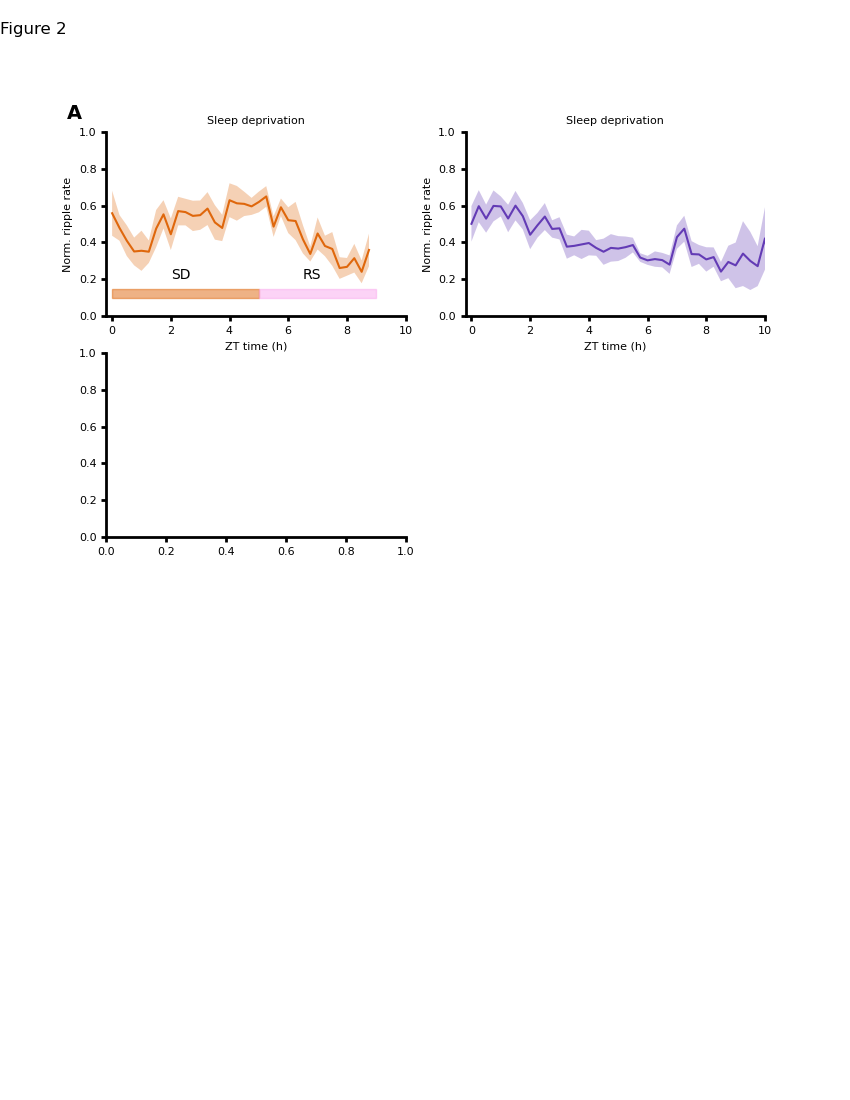

In [7]:
%matplotlib widget
from neuropy import plotting

figure = plotting.Fig()
fig,gs= figure.draw(grid=(4,2))
fig.suptitle('Figure 2',x=0,ha='left')

#--- panel a --------

# rpl_indx = [112,6050]
# rpl_chan = 89
# sd_sess = sd_sessions[5]
# rpl_df = sd_sess.ripple.to_dataframe()
# rpl_colors = ['#6ce953','#d3bc0d']

# gs_filt = figure.subplot2grid(gs[0,:2],grid=(2,1))
# for i,(rpl_ind,rpl_color) in enumerate(zip(rpl_indx,rpl_colors)):
#     rpl_start,rpl_stop =rpl_df.iloc[rpl_ind].start,rpl_df.iloc[rpl_ind].stop
#     rpl_peaktime = rpl_df.iloc[rpl_ind].peaktime
#     ax = plt.subplot(gs_filt[i])
#     signal = sd_sess.eegfile.get_signal(channel_indx=rpl_chan,t_start=rpl_start-3,t_stop=rpl_start+3)
#     filt_signal = signal_process.filter_sig.bandpass(signal=signal,lf=150,hf=250)
#     plotting.plot_signal_traces(filt_signal, ax=ax,lw=0.5,color='gray')
#     ax.scatter(rpl_peaktime,1.2,s=20,marker='v',c=rpl_color)

#     if i==0:
#         # ax.text(0,0.5,'Early')
#         ax.set_title('Ripple band (150-250 Hz)')
#         figure.panel_label(ax=ax,label='A',fontsize=14)


# gs_rpl = figure.subplot2grid(gs[0,0],grid=(1,2))
# for i,(rpl_ind,rpl_color) in enumerate(zip(rpl_indx,rpl_colors)):
#     ax_rpl = plt.subplot(gs_rpl[i])
#     rpl_start,rpl_stop =rpl_df.iloc[rpl_ind].start,rpl_df.iloc[rpl_ind].stop
#     rpl_chans = sd_sess.probegroup.get_connected_channels(groupby='shank')[5]
#     rpl_starts = sd_sess.ripple.starts
#     rpl_stops = sd_sess.ripple.stops
#     rpl = sd_sess.eegfile.get_signal(channel_indx=rpl_chans.astype('int'),t_start=rpl_start-0.05,t_stop = rpl_stop+0.02)
#     plotting.plot_signal_traces(rpl,ax=ax_rpl,pad=0.8,color=rpl_color)
#     ax_rpl.set_yticklabels('')
    # if i==0:
    # ax_rpl.set_title(f't = {}')


#----- panel b,c,d ---------
rpl_colors = [subjects.sd_colors['sd'],subjects.sd_colors['nsd']]
dfs = [sd_rpl_rate_df,nsd_rpl_rate_df]
rpl_rate_labels=['A','']
for i,(data,col) in enumerate(zip(dfs,rpl_colors)): 
    ax_rate1 = plt.subplot(gs[0,i])
    # sns.lineplot(data=data,x='tbin',y='n_ripples',ci='sd',ax=ax_rate1,color=col)
    # data.drop(['sub'],inplace=True)
    data_mean = data.groupby('tbin').mean()
    data_sem = data.groupby('tbin').sem(ddof=0)
    # ax_rate1.errorbar(data_mean.index,data_mean.n_ripples,data_sem.n_ripples,color=col,capsize=3)
    ax_rate1.fill_between(data_mean.index,(data_mean-data_sem).n_ripples,(data_mean+data_sem).n_ripples,color=col,alpha=0.3,ec=None)
    ax_rate1.plot(data_mean.index,data_mean.n_ripples,color=col)
    ax_rate1.set_title('Sleep deprivation')
    ax_rate1.set_xlabel('ZT time (h)')
    ax_rate1.set_ylabel('Norm. ripple rate')
    ax_rate1.set_xlim([-0.2,10])
    # ax_rate1.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
    ax_rate1.set_ylim([0,1])
    figure.panel_label(ax_rate1,rpl_rate_labels[i],fontsize=14)

    if i==0:
        ax_rate1.axvspan(0,5,0.1,0.15,color=col,alpha=0.5)
        ax_rate1.text(2,0.2,'SD')
        ax_rate1.text(6.5,0.2,'RS')
        ax_rate1.axvspan(5,9,0.1,0.15,color='#faa8ee',alpha=0.5)


#---panel e -----
pbe_color = [subjects.sd_colors['sd'],subjects.sd_colors['nsd']]
for i, grp in enumerate(['sd','nsd']):
    ax_pbe = plt.subplot(gs[1,i])
    df = pbe_df[pbe_df['grp']==grp]
    pbe_mean = df.groupby('tbin').mean().n_pbe
    pbe_sem= df.groupby('tbin').sem(ddof=0).n_pbe
    ax_pbe.fill_between(pbe_mean.index,pbe_mean-pbe_sem,pbe_mean+pbe_sem,color=pbe_color[i],alpha=0.3)
    ax_pbe.plot(pbe_mean.index,pbe_mean,color=pbe_color[i])
    ax_pbe.set_ylim([0.05,0.8])

    ax_pbe.set_xlabel('Zt time (h)')
    ax_pbe.set_ylabel('PBE rate (Hz)')
    if i==0:
        figure.panel_label(ax_pbe,'B')
        ax_pbe.axvspan(0,5,0.1,0.15,color=pbe_color[i],alpha=0.5)
        ax_pbe.text(2,0.2,'SD')
        ax_pbe.text(6.5,0.2,'RS')
        ax_pbe.axvspan(5,9,0.1,0.15,color='#faa8ee',alpha=0.5)

#----- Figure caption ---------
ax_rate4 = plt.subplot(gs[3,:])
ax_rate4.text(0,0.5,'Figure 2: Increasing rate of ripples and PBE events during sleep deprivation. \n(A) Ripple rate during POST of SD and NSD session.\n(B) PBE rate during POST of SD and NSD session. Error bars respresent SEM.',wrap=True)
ax_rate4.axis('off')


# figure.savefig(subjects.figpath_sd/'figure2')